In [1]:
using D4M

# Intro

## Assoc Intro

### AI1 Setup

Hello! This is a test on the basic Assoc Array construction. Associative array takes on entries of triplets, and it will parse an array of substrings that is divided by char divider.

--Please note that this divider is indicated as the last char in the string.

In [2]:
row = "a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,a,aa,aaa,b,bb,bbb,"
column = "a,aa,aaa,b,bb,bbb,a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,"
values = "a-a,a-aa,a-aaa,a-b,a-bb,a-bbb,a-a,aa-a,aaa-a,b-a,bb-a,bbb-a,a-a,aa-aa,aaa-aaa,b-b,bb-bb,bbb-bbb,"

# Create assoc array and list triples.
A = Assoc(row,column,values)

Assoc(Union{AbstractString, Number}["a", "aa", "aaa", "b", "bb", "bbb"], Union{AbstractString, Number}["a", "aa", "aaa", "b", "bb", "bbb"], Union{AbstractString, Number}["a-a", "a-aa", "a-aaa", "a-b", "a-bb", "a-bbb", "aa-a", "aa-aa", "aaa-a", "aaa-aaa", "b-a", "b-b", "bb-a", "bb-bb", "bbb-a", "bbb-bbb"], 
  [1, 1]  =  1
  [2, 1]  =  7
  [3, 1]  =  9
  [4, 1]  =  11
  [5, 1]  =  13
  [6, 1]  =  15
  [1, 2]  =  2
  [2, 2]  =  8
  [1, 3]  =  3
  [3, 3]  =  10
  [1, 4]  =  4
  [4, 4]  =  12
  [1, 5]  =  5
  [5, 5]  =  14
  [1, 6]  =  6
  [6, 6]  =  16)

This is the data structure of the Associative Array Class:

In [3]:
dump(A)

Assoc
  row: Array{Union{AbstractString, Number}}((6,))
    1: SubString{String}
      string: String "a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,a,aa,aaa,b,bb,bbb,"
      offset: Int64 0
      endof: Int64 1
    2: SubString{String}
      string: String "a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,a,aa,aaa,b,bb,bbb,"
      offset: Int64 14
      endof: Int64 2
    3: SubString{String}
      string: String "a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,a,aa,aaa,b,bb,bbb,"
      offset: Int64 17
      endof: Int64 3
    4: SubString{String}
      string: String "a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,a,aa,aaa,b,bb,bbb,"
      offset: Int64 21
      endof: Int64 1
    5: SubString{String}
      string: String "a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,a,aa,aaa,b,bb,bbb,"
      offset: Int64 23
      endof: Int64 2
    6: SubString{String}
      string: String "a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,a,aa,aaa,b,bb,bbb,"
      offset: Int64 26
      endof: Int64 3
  col: Array{Union{AbstractString, Number}}((6,))
    1: SubString{String}
      string: String "a,

The printFull function allows it to be printed in a tabular form.

In [109]:
printFull(A)

7×7 Array{Union{AbstractString, Number},2}:
 ""      "a"   "aa"   "aaa"   "b"   "bb"   "bbb"
 "a"    1     1      1       1     1      1     
 "aa"   1     1      0       0     0      0     
 "aaa"  1     0      1       0     0      0     
 "b"    1     0      0       1     0      0     
 "bb"   1     0      0       0     1      0     
 "bbb"  1     0      0       0     0      1     

When written into CSV form, the data is stored in the tabular form.

In [110]:
WriteCSV(A,"A.csv")

### AI2 Subsref

This is a test on the subreferencing of Associative Array.

In [6]:
A = ReadCSV("A.csv")

Get rows a and b.

In [7]:
A1r = A["a,b,",:]

print(A1r)

  [a, a  ]  =  a-a
  [b, a  ]  =  b-a
  [a, aa ]  =  a-aa
  [a, aaa]  =  a-aaa
  [a, b  ]  =  a-b
  [b, b  ]  =  b-b
  [a, bb ]  =  a-bb
  [a, bbb]  =  a-bbb


Get rows containing a and columns 1 thru 3 (not yet supported).

In [8]:
#A2r = A["a *,",1:3]

#print(A2r)

Get rows a to b.

In [9]:
A3r = A["a,:,b,",:]

print(A3r)

  [a  , a  ]  =  a-a
  [aa , a  ]  =  aa-a
  [aaa, a  ]  =  aaa-a
  [b  , a  ]  =  b-a
  [a  , aa ]  =  a-aa
  [aa , aa ]  =  aa-aa
  [a  , aaa]  =  a-aaa
  [aaa, aaa]  =  aaa-aaa
  [a  , b  ]  =  a-b
  [b  , b  ]  =  b-b
  [a  , bb ]  =  a-bb
  [a  , bbb]  =  a-bbb


Get rows starting with a or c.

In [10]:
A4r = A[StartsWith("a,c,"),:]

print(A4r)

  [a  , a  ]  =  a-a
  [aa , a  ]  =  aa-a
  [aaa, a  ]  =  aaa-a
  [a  , aa ]  =  a-aa
  [aa , aa ]  =  aa-aa
  [a  , aaa]  =  a-aaa
  [aaa, aaa]  =  aaa-aaa
  [a  , b  ]  =  a-b
  [a  , bb ]  =  a-bb
  [a  , bbb]  =  a-bbb


Get cols a and b.

In [11]:
A1c = A[:,"a,b,"]

print(A1c)

  [a  , a]  =  a-a
  [aa , a]  =  aa-a
  [aaa, a]  =  aaa-a
  [b  , a]  =  b-a
  [bb , a]  =  bb-a
  [bbb, a]  =  bbb-a
  [a  , b]  =  a-b
  [b  , b]  =  b-b


Get rows 1 thru 3 and cols containing a (not yet supported).

In [12]:
#A2c = A[1:3,"a *,"]

#print(A2c)

Get cols a to b.

In [13]:
A3c = A[:,"a,:,b,"]

print(A3c)

  [a  , a  ]  =  a-a
  [aa , a  ]  =  aa-a
  [aaa, a  ]  =  aaa-a
  [b  , a  ]  =  b-a
  [bb , a  ]  =  bb-a
  [bbb, a  ]  =  bbb-a
  [a  , aa ]  =  a-aa
  [aa , aa ]  =  aa-aa
  [a  , aaa]  =  a-aaa
  [aaa, aaa]  =  aaa-aaa
  [a  , b  ]  =  a-b
  [b  , b  ]  =  b-b


Get cols starting with a or b.

In [14]:
A4c = A[:,StartsWith("a,c,")]

print(A4c)

  [a  , a  ]  =  a-a
  [aa , a  ]  =  aa-a
  [aaa, a  ]  =  aaa-a
  [b  , a  ]  =  b-a
  [bb , a  ]  =  bb-a
  [bbb, a  ]  =  bbb-a
  [a  , aa ]  =  a-aa
  [aa , aa ]  =  aa-aa
  [a  , aaa]  =  a-aaa
  [aaa, aaa]  =  aaa-aaa


Get all values less than b (not yet supported for string values).

In [108]:
#A1v = (A < "b,")

#print(A1v)

### AI3 Math

This section demos some of the mathematical operations on Associative Array.

In [104]:
A = ReadCSV("A.csv")
A = logical(A)

printFull(A)

7×7 Array{Union{AbstractString, Number},2}:
 ""      "a"   "aa"   "aaa"   "b"   "bb"   "bbb"
 "a"    1     1      1       1     1      1     
 "aa"   1     1      0       0     0      0     
 "aaa"  1     0      1       0     0      0     
 "b"    1     0      0       1     0      0     
 "bb"   1     0      0       0     1      0     
 "bbb"  1     0      0       0     0      1     

We can sum down rows and across columns.

In [106]:
printFull(sum(A,1))
printFull(sum(A,2))

2×7 Array{Union{AbstractString, Number},2}:
  ""   "a"   "aa"   "aaa"   "b"   "bb"   "bbb"
 1.0  6     2      2       2     2      2     

7×2 Array{Union{AbstractString, Number},2}:
 ""     1.0
 "a"    6  
 "aa"   2  
 "aaa"  2  
 "b"    2  
 "bb"   2  
 "bbb"  2  

Compute a simple join.

In [ ]:
Aa = A[:,"a,"]
Ab = A[:,"b,"]
Aab = nocol(Aa) & nocol(Ab)

printFull(Aab)

Compute a histogram (facets) and normalized histogram of other columns that are in rows with both a and b.

In [ ]:
F =  ( Aab )' * A;
printFull(F)

Fn = F ./ sum(A,1)
printFull(Fn)

Compute correlation

In [ ]:
AtA = sqIn(A)
d = diag(Adj(AtA))
AtA = putAdj(AtA,Adj(AtA) - sparse(diagm(d)))
printFull(AtA)

### AI4 Advanced Constsruction

Mixed string and numeric associative arrays.

In [102]:
# String  vectors *must* be ROW vectors
iStr =  "01,02,03,04,21,22,23,24,41,51,61,62,63,64,"; 

# Numeric vectors *must* be COLUMN vectors
iNum =  [ 1  1  1  1  4  3  2  1 4  5  6  6  6  6 ]';

Mixed type empty arrays.

In [ ]:
# All empty.
A00 = Assoc("","","");

# Empty row.
A01 = Assoc("",iStr,iNum);

# Empty value.
A02 = Assoc(iNum,iStr,"");

# Empty column and value.
A03 = Assoc(iNum,[],"");

# All empty.
A04 = Assoc("",[],[]);

# All empty.
A05 = Assoc("","",[]);

# Row and value empty.
A06 = Assoc("",iNum,[]);


Mixed type non-empty arrays. (Commented out cells are not yet supported)

String scalar,  string vector,  numeric vector.

In [ ]:
# A11 = Assoc("a,",iStr,iNum);

# printFull(A11)

Numeric vector, string vector,  string scalar.

In [ ]:
#A12 = Assoc(iNum,iStr,"a,");

# printFull(A12)

Numeric vector, numeric scalar, string scalar.

In [ ]:
#A13 = Assoc(iNum,1,"a,");

# printFull(A13)

String scalar,  numeric scalar, numeric scalar.

In [101]:
A14 = Assoc("a,",1,1);

printFull(A14)

2×2 Array{Union{AbstractString, Number},2}:
 ""   1
 "a"  1

String scalar,  string scalar,  numeric scalar.

In [100]:
A15 = Assoc("a,","a,",1);

printFull(A15)

2×2 Array{Union{AbstractString, Number},2}:
 ""    "a"
 "a"  1   

String scalar,  numeric vector, numeric scalar.

In [ ]:
#A16 = Assoc("a,",iNum,1);

# printFull(A16)

## Edge Art

### EA1 Graph

Forming adjacency graphs

Read CSV file into associative array. Get vertices and convert to numbers.

In [97]:
E = ReadCSV("Edge.csv")

Ev = logical( E[:, StartsWith("V,")] )
printFull(Ev)

20×21 Array{Union{AbstractString, Number},2}:
 ""     "V01"   "V02"   "V03"   "V04"  …   "V17"   "V18"   "V19"   "V20"
 "B1"  1       1       1       0          0       0       0       0     
 "B2"  0       0       0       1          0       0       0       0     
 "G1"  1       1       1       0          0       0       0       0     
 "G2"  0       0       0       1          0       0       0       0     
 "O1"  1       1       1       0       …  0       0       0       0     
 "O2"  1       1       1       0          0       0       0       0     
 "O3"  0       0       0       1          0       0       0       0     
 "O4"  0       0       0       1          0       0       0       0     
 "O5"  0       1       0       0          0       0       0       1     
 "P1"  1       1       1       0       …  0       0       0       0     
 "P2"  0       0       0       1          0       0       0       0     
 "P3"  0       0       0       0          0       0       0       0     
 "P4"

Compute vertex adjacency graph.

In [98]:
Av = sqIn(Ev)
printFull(Av)

21×21 Array{Union{AbstractString, Number},2}:
 ""      "V01"   "V02"   "V03"   "V04"  …   "V17"   "V18"   "V19"   "V20"
 "V01"  6       6       6       0          0       0       0       0     
 "V02"  6       9       6       0          0       0       0       1     
 "V03"  6       6       6       0          0       0       0       0     
 "V04"  0       0       0       6          0       0       0       0     
 "V05"  0       0       0       6       …  0       1       0       0     
 "V06"  0       1       0       6          0       0       0       1     
 "V07"  0       0       0       6          0       0       1       0     
 "V08"  0       0       0       6          0       0       0       0     
 "V09"  0       1       0       0          0       0       0       1     
 "V10"  0       1       0       0       …  0       0       0       0     
 "V11"  0       1       0       0          0       0       0       1     
 "V12"  0       1       0       0          0       0       0      

Compute edge adjacency graph.

In [99]:
Ae = sqOut(Ev)
printFull(Ae)

20×20 Array{Union{AbstractString, Number},2}:
 ""     "B1"   "B2"   "G1"   "G2"  …   "P6"   "P7"   "P8"   "S1"   "S2"
 "B1"  3      0      3      0         0      0      0      3      0    
 "B2"  0      5      0      5         0      1      1      0      5    
 "G1"  3      0      3      0         0      0      0      3      0    
 "G2"  0      5      0      5         0      1      1      0      5    
 "O1"  3      0      3      0      …  0      0      0      3      0    
 "O2"  3      0      3      0         0      0      0      3      0    
 "O3"  0      5      0      5         0      1      1      0      5    
 "O4"  0      5      0      5         0      1      1      0      5    
 "O5"  1      1      1      1         1      0      1      1      1    
 "P1"  3      0      3      0      …  0      0      0      3      0    
 "P2"  0      5      0      5         0      1      1      0      5    
 "P3"  0      0      0      0         0      0      0      0      0    
 "P4"  1      0   

### EA2 Subsref

Show different wasy to index associative arrays.

Read CSV file into associative array.

In [93]:
E = ReadCSV("Edge.csv");
printFull(E);

20×23 Array{Union{AbstractString, Number},2}:
 ""    "Color"   "Order"  "V01"  "V02"  …  "V16"  "V17"  "V18"  "V19"  "V20"
 "B1"  "Blue"    "2"      "1"    "1"       ""     ""     ""     ""     ""   
 "B2"  "Blue"    "2"      ""     ""        ""     ""     ""     ""     ""   
 "G1"  "Green"   "2"      "1"    "1"       ""     ""     ""     ""     ""   
 "G2"  "Green"   "2"      ""     ""        ""     ""     ""     ""     ""   
 "O1"  "Orange"  "2"      "1"    "1"    …  ""     ""     ""     ""     ""   
 "O2"  "Orange"  "2"      "1"    "1"       ""     ""     ""     ""     ""   
 "O3"  "Orange"  "2"      ""     ""        ""     ""     ""     ""     ""   
 "O4"  "Orange"  "2"      ""     ""        ""     ""     ""     ""     ""   
 "O5"  "Orange"  "1"      ""     "1"       "1"    ""     ""     ""     "1"  
 "P1"  "Pink"    "2"      "1"    "1"    …  ""     ""     ""     ""     ""   
 "P2"  "Pink"    "2"      ""     ""        ""     ""     ""     ""     ""   
 "P3"  "Pink"    "2"      ""  

Get orange edges.

In [94]:
Eo = E[(E[:,"Color,"] == "Orange" ).row,:];
printFull(Eo);

6×15 Array{Union{AbstractString, Number},2}:
 ""    "Color"   "Order"  "V01"  "V02"  …  "V08"  "V09"  "V11"  "V16"  "V20"
 "O1"  "Orange"  "2"      "1"    "1"       ""     ""     ""     ""     ""   
 "O2"  "Orange"  "2"      "1"    "1"       ""     ""     ""     ""     ""   
 "O3"  "Orange"  "2"      ""     ""        "1"    ""     ""     ""     ""   
 "O4"  "Orange"  "2"      ""     ""        "1"    ""     ""     ""     ""   
 "O5"  "Orange"  "1"      ""     "1"    …  ""     "1"    "1"    "1"    "1"  

Get orange and green edges.

In [95]:
Eog = E[ StartsWith("O,G,") ,:];
printFull(Eog);

8×15 Array{Union{AbstractString, Number},2}:
 ""    "Color"   "Order"  "V01"  "V02"  …  "V08"  "V09"  "V11"  "V16"  "V20"
 "G1"  "Green"   "2"      "1"    "1"       ""     ""     ""     ""     ""   
 "G2"  "Green"   "2"      ""     ""        "1"    ""     ""     ""     ""   
 "O1"  "Orange"  "2"      "1"    "1"       ""     ""     ""     ""     ""   
 "O2"  "Orange"  "2"      "1"    "1"       ""     ""     ""     ""     ""   
 "O3"  "Orange"  "2"      ""     ""     …  "1"    ""     ""     ""     ""   
 "O4"  "Orange"  "2"      ""     ""        "1"    ""     ""     ""     ""   
 "O5"  "Orange"  "1"      ""     "1"       ""     "1"    "1"    "1"    "1"  

### EA3 SubGraph

Show some associative array math.

Read CSV file into associative array, get vertices and convert to numbers.

In [88]:
E = ReadCSV("Edge.csv");
Ev = logical( E[:, StartsWith("V,")] );

Get orange and green edges.

In [89]:
EvO = Ev[StartsWith("O,"),:];
EvG = Ev[StartsWith("G,"),:];

Compute (empty) vertex adjacency graph.

In [90]:
AvOG = transpose(EvO) * EvG;
printFull(AvOG);

Assoc(Union{AbstractString, Number}[], Union{AbstractString, Number}[], Union{AbstractString, Number}[1.0], 0×0 SparseMatrixCSC{Int64,Int64} with 0 stored entries)

Compute edge adjacency graph.

In [91]:
AeOG = EvO * transpose(EvG)
printFull(AeOG)

6×3 Array{Union{AbstractString, Number},2}:
 ""     "G1"   "G2"
 "O1"  3      0    
 "O2"  3      0    
 "O3"  0      5    
 "O4"  0      5    
 "O5"  1      1    

Compute edge adjacency graph preserving keys.

In [92]:
AeOG = CatKeyMul(EvO,transpose(EvG))
printFull(AeOG)

6×3 Array{Union{AbstractString, Number},2}:
 ""     "G1"   "G2"
 "O1"  3      0    
 "O2"  3      0    
 "O3"  0      5    
 "O4"  0      5    
 "O5"  1      1    

# Apps

## Entity Analysis

### EA1 Read

Read entity data and organize into sparse associative array.

Entity data are derived summaries obtained by from automated
entity extraction algorithms applied to <1% of the NIST Rueters Corpus.
See: http://trec.nist.gov/data/reuters/reuters.html

In [75]:
using PyPlot,JLD

file_dir = Pkg.dir("D4M")*"/examples/2Apps/1EntityAnalysis/Entity.csv";
save_dir = "Entity.jld";

E_raw = ReadCSV(file_dir);
printFull(E_raw[1:5,:]);

6×5 Array{Union{AbstractString, Number},2}:
  ""  "doc"                  "entity"       "position"     "type"    
 1    "19960825_13108.txt"   "addis ababa"  "54;132;974;"  "LOCATION"
 2    "19960930_84704.txt"   "addis ababa"  "60;"          "LOCATION"
 3    "19961004_96087.txt"   "addis ababa"  "61;305;"      "LOCATION"
 4    "19961006_98377.txt"   "addis ababa"  "68;"          "LOCATION"
 5    "19961009_104796.txt"  "addis ababa"  "59;443;"      "LOCATION"

Organize data into new format.

In [76]:
row,col,doc_val      = find(E_raw[:,"doc,"])
row,col,entity_val   = find(E_raw[:,"entity,"])
row,col,position_val = find(E_raw[:,"position,"])
row,col,type_val     = find(E_raw[:,"type,"])

typeEntity_val = CatStr(type_val, "/" , entity_val); 

Create a sparse associative array of all the data.

In [77]:
E = Assoc(doc_val,typeEntity_val,position_val);

Show a few rows and plot a spy plot.

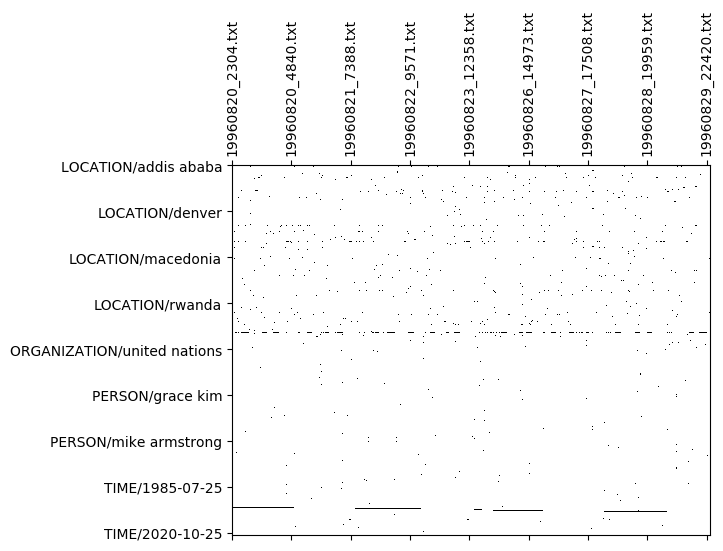

  [19960820_2414.txt, LOCATION/brazil       ]  =  1;47;164;
  [19960820_2324.txt, LOCATION/britain      ]  =  76;
  [19960820_2344.txt, LOCATION/britain      ]  =  335;
  [19960820_2324.txt, LOCATION/england      ]  =  167;853;1808;
  [19960820_2344.txt, LOCATION/europe       ]  =  1215;1638;
  [19960820_2344.txt, LOCATION/germany      ]  =  1138;
  [19960820_2344.txt, LOCATION/ireland      ]  =  347;
  [19960820_2324.txt, LOCATION/london       ]  =  59;
  [19960820_2344.txt, LOCATION/london       ]  =  43;
  [19960820_2374.txt, LOCATION/london       ]  =  52;452;
  [19960820_2374.txt, LOCATION/new york     ]  =  173;2013;
  [19960820_2304.txt, LOCATION/united states]  =  1;
  [19960820_2304.txt, LOCATION/washington   ]  =  55;
  [19960820_2304.txt, PERSON/arshad mohammed]  =  77;
  [19960820_2324.txt, PERSON/eddie george   ]  =  1280;
  [19960820_2324.txt, PERSON/kenneth clarke ]  =  1636;
  [19960820_2344.txt, TIME/1996-06-30       ]  =  469;
  [19960820_2304.txt, TIME/1996-08-20    

PyObject <matplotlib.image.AxesImage object at 0x1dc2b0d0>

In [80]:
print(E[1:5,:])
spy(E[1:1000,:]')

Save associative array.

In [81]:
save(save_dir,"E",E);

### EA2 Statistics

Compute statistics on entity data.

In [ ]:
using JLD, PyPlot

file_dir = "./Entity.jld";
E = load(file_dir)["E"];

Calculate number of entities in each category, then count the number of times each entity occurs.

In [ ]:
print(sum(logical(col2type(E,"/")),1))
En = sum(logical(E),1);

Plot the log-log plot of location frequencies. Notice the power-law distribution.

In [ ]:
row,entity,count = find(En);
An = Assoc(count,entity,1);

loglog(full(sum(Adj(An[:,StartsWith("LOCATION/,")]),2)) ,"o"); 

### Facet

Entity facet search. Shows next most common terms.

In [ ]:
using JLD

file_dir = "./Entity.jld";
E = load(file_dir)["E"];
E = logical(E);

Facet search: Finding entities that occur commonly with LOCATION/new york and PERSON/michael chang.

In [ ]:
x = "LOCATION/new york,";
p = "PERSON/michael chang,";
F = ( nocol(E[:,x]) & nocol(E[:,p]))' * E;
print(F' > 1 )

Normalize the previous result.

In [ ]:
Fn = F ./ sum(E,1)
print((Fn' > 0.02))

### Graph

Compute graphs from entity edge data.

In [82]:
using JLD,PyPlot
file_dir = "./Entity.jld";
E = load(file_dir)["E"]

Assoc(Union{AbstractString, Number}["19960820_2304.txt", "19960820_2324.txt", "19960820_2344.txt", "19960820_2374.txt", "19960820_2414.txt", "19960820_2439.txt", "19960820_2469.txt", "19960820_2493.txt", "19960820_2515.txt", "19960820_2539.txt"  …  "19970731_769676.txt", "19970731_771000.txt", "19970801_772203.txt", "19970801_773504.txt", "19970801_773804.txt", "19970802_810776.txt", "19970803_774604.txt", "19970803_774644.txt", "19970804_775036.txt", "19970804_777356.txt"], Union{AbstractString, Number}["LOCATION/addis ababa", "LOCATION/aden", "LOCATION/adriatic sea", "LOCATION/aegean sea", "LOCATION/afghanistan", "LOCATION/africa", "LOCATION/akron", "LOCATION/alabama", "LOCATION/alaska", "LOCATION/albania"  …  "TIME/2040-05-26", "TIME/2040-09-08", "TIME/2041-08-18", "TIME/2041-08-23", "TIME/2041-08-25", "TIME/2041-09-01", "TIME/2042-06-21", "TIME/2043-04-20", "TIME/2043-05-25", "TIME/2099-12-31"], Union{AbstractString, Number}["1000;", "1000;1032;1302;1548;1668;2272;", "1000;1042;140

Computing adjacency matrix for the Entity-Entity graph.

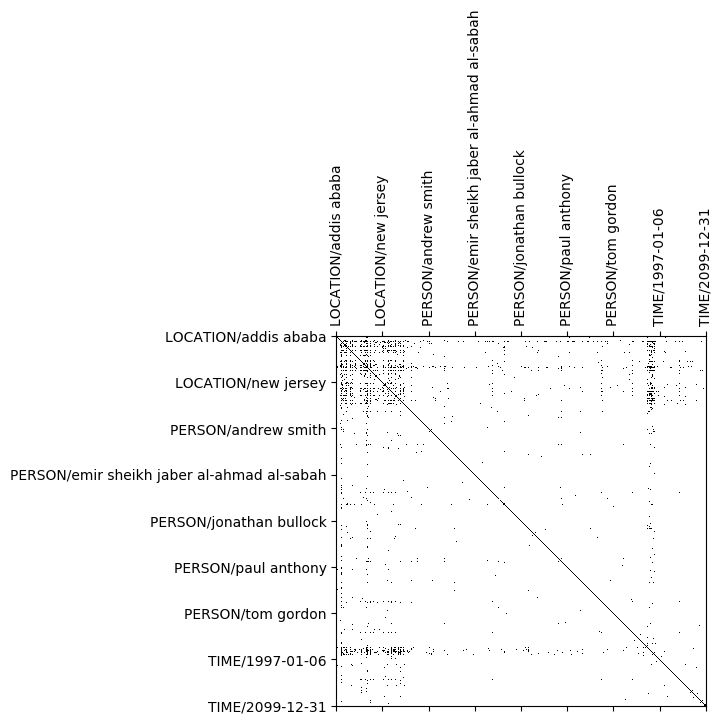

In [83]:
Es = E;
E = logical(E);
Ae = sqIn(E);

spy(Ae);

Compute entity-entity graph that preserves original values (documents)).

In [ ]:
# Limit to people with names starting with j
p = StartsWith("PERSON/j,");
Ep = E[:,p];

# Correlate while preserving pedigree
Ap = CatKeyMul(Ep',Ep);
spy(Ap);

Create document-document graph: documents that contain the same entities.

In [ ]:
Ad = sqOut(Ep);
spy(Ad);

### Graph Query

Various ways to query subgraphs.

In [42]:
using JLD,PyPlot

file_dir = "./Entity.jld"
E = load(file_dir)["E"]
E = logical(E);

Compute entity (all facet pairs).

In [46]:
A = sqIn(E)
d = diag(Adj(A))
A = A - diag(A)

A[2,:]

Assoc(Union{AbstractString, Number}["LOCATION/aden"], Union{AbstractString, Number}["LOCATION/sana'a", "LOCATION/yemen", "PERSON/abdul wali al-shumairi", "TIME/1996-08-21", "TIME/1996-10-26"], Union{AbstractString, Number}[1.0, 2.0], 
  [1, 1]  =  1
  [1, 2]  =  2
  [1, 3]  =  1
  [1, 4]  =  1
  [1, 5]  =  1)

Compute normalized correlation.

In [48]:
i,j,v = findnz(Adj(A));
An = putAdj(A, sparse(i,j,v ./ min.(d[i],d[j])))

print(An[2,:])

  [LOCATION/aden, LOCATION/sana'a              ]  =  1
  [LOCATION/aden, LOCATION/yemen               ]  =  2
  [LOCATION/aden, PERSON/abdul wali al-shumairi]  =  2
  [LOCATION/aden, TIME/1996-08-21              ]  =  1
  [LOCATION/aden, TIME/1996-10-26              ]  =  1


Multi-facet queries.

In [50]:
x = "LOCATION/new york,";
p = StartsWith("PERSON/,");
printFull( (A[p,x] > 4) & (An[p,x] > 0.3));

8×2 Array{Union{AbstractString, Number},2}:
 ""                         "LOCATION/new york"
 "PERSON/alex brown"       1.0                 
 "PERSON/chris reese"      1.0                 
 "PERSON/hugh johnson"     1.0                 
 "PERSON/ian simpson"      1.0                 
 "PERSON/jacqueline wong"  1.0                 
 "PERSON/john kennedy"     1.0                 
 "PERSON/nicholas burns"   1.0                 

Find triangles.

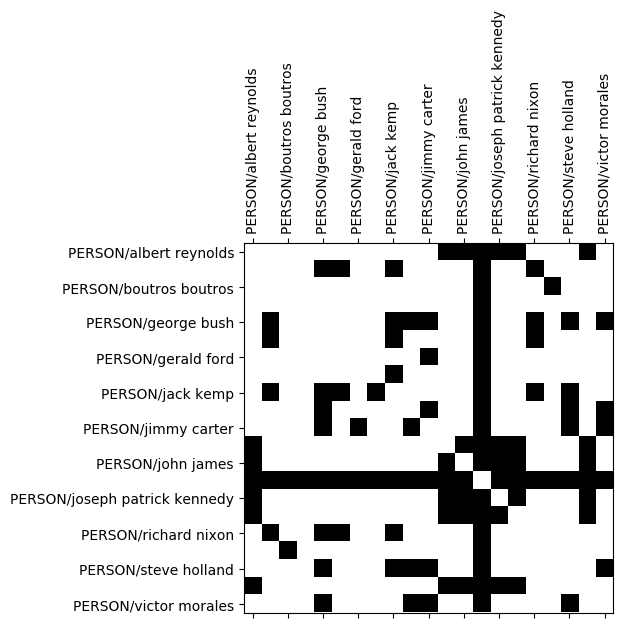

  [PERSON/jack kemp    , PERSON/george bush  ]  =  2
  [PERSON/steve holland, PERSON/george bush  ]  =  3
  [PERSON/george bush  , PERSON/jack kemp    ]  =  2
  [PERSON/richard nixon, PERSON/jack kemp    ]  =  3
  [PERSON/jack kemp    , PERSON/richard nixon]  =  3
  [PERSON/george bush  , PERSON/steve holland]  =  3


In [52]:
p0 = "PERSON/john kennedy,";

p1 = Row(A[p,p0] + A[p0,p]);
spy(A[p1,p1])

p2 = Row( A[p1,p1] - (A[p,p0]+ A[p0,p]));
print(A[p2,p2] > 1)

## Track Analysis

### Build

General approach to computing tracks from entity edge data.

In [54]:
using JLD,PyPlot

E = load("Entity.jld")["E"]
E = logical(E);

Show general purpose method for building tracks.

In [57]:
p = StartsWith("PERSON/,")      # Set entity range.
t = StartsWith("TIME/,")        # Set time range.
x = StartsWith("LOCATION/,")    # Set spatial range.
a = StartsWith("PERSON/,TIME/,LOCATION/,");

Limit to edges with all three.

In [56]:
E3 = E[Row( sum(E[:,p],2) & sum(E[:,t],2) & sum(E[:,x],2) ),a];

Collapse to get unique time and space for each edge and get triples.

In [58]:
edge,time  = find(  val2col(col2type(E3[:,t],"/"),"/")  )
edge,space = find(  val2col(col2type(E3[:,x],"/"),"/")  )

Etx = Assoc(edge,time,space)     # Combine edge, time and space.
Ext = Assoc(edge,space,time)     # Combine edge, space and time.

Construct time tracks with matrix multiply.

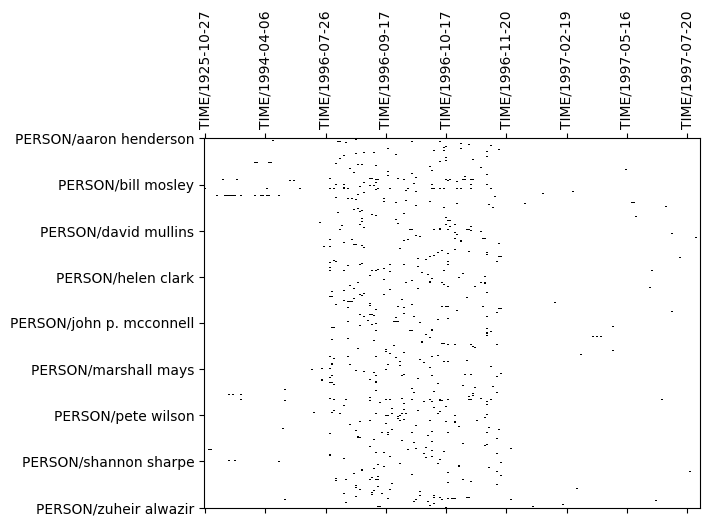

(-0.5, 246.5, 2090.5, -0.5)

In [61]:
At = CatValMul(transpose(Etx),E3[:,p]) 
spy(At')
axis("auto")

Construct space tracks with matrix multiply.

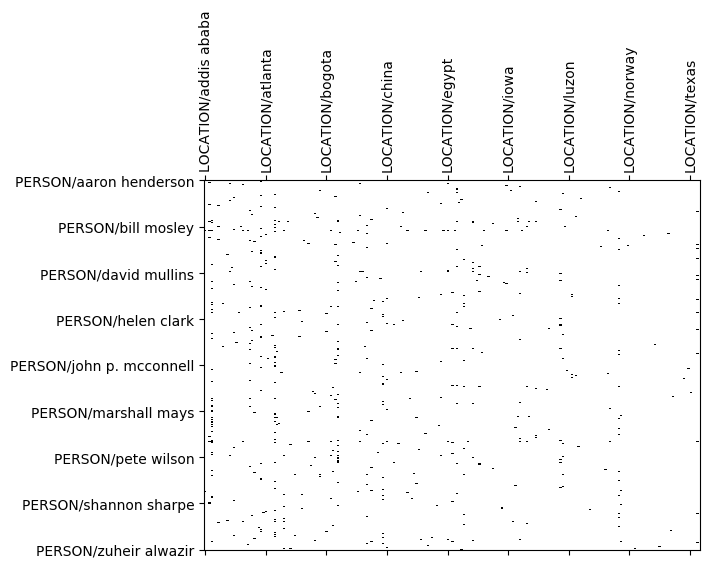

(-0.5, 220.5, 2090.5, -0.5)

In [62]:
Ax = CatValMul(transpose(Ext),E3[:,p]) 
spy(Ax')
axis("auto")

### TA2 Query

Compute tracks from entity edge data.

In [67]:
function findtracks(A,t,p,l);
#FINDTRACKS creates track associative array.

    # Find docs that have person
    DocIDwPer = Row(A[:,p]);

    # Find docs that have person and location.
    DocIDwPerLoc = Row(A[DocIDwPer,l]);

    # Find docs that have person, location and time.
    DocIDwPerLocTime = Row(A[DocIDwPerLoc,t]);

    # Limit to these documents.
    AA = A[DocIDwPerLocTime,:];

    # Get person sub array.
    Aper = AA[DocIDwPerLocTime,p];
    TrackPer,DocAper = find(Aper');

    # Get location sub array.
    Aloc = AA[DocIDwPerLocTime,l];
    EntAloc,DocAloc = find(Aloc');

    # Get Single location per document- order by actors
    uLocDocs = unique(DocAloc)
    uLocDocIdx = [1; indexin(uLocDocs,DocAloc)[1:end-1]+1] # get first index of unique docs (correct for getting highest)
    uDocLocs = EntAloc[uLocDocIdx] # single locations per document
    uLocDocIdxinDocAper = indexin(DocAper,uLocDocs) # locations of unique loc docs in per doc list
    TrackLoc = uDocLocs[uLocDocIdxinDocAper]

    # Get time sub array.
    Atime = AA[DocIDwPerLocTime,t];
    EntAtime,DocAtime = find(Atime');

    # Get Single time per document- order by actors
    uTimeDocs = unique(DocAtime)
    uTimeDocIdx = [1; indexin(uTimeDocs,DocAtime)[1:end-1]+1] # get first index of unique docs (correct for getting highest)
    uDocTimes = EntAtime[uTimeDocIdx] # single times per document
    uTimeDocIdxinDocAper = indexin(DocAper,uTimeDocs) # locations of unique time docs in per doc list
    TrackTime = uDocTimes[uTimeDocIdxinDocAper]

    Tr = Assoc(TrackTime,TrackPer,TrackLoc);
                    
end

findtracks (generic function with 1 method)

Load edge incidence matrix.

In [69]:
using JLD

E = load("Entity.jld")["E"]
Es = E
A = logical(E);

Set prefixes and build entity tracks using findtracks function.

In [84]:
p = StartsWith("PERSON/,")
t = StartsWith("TIME/,")
x = StartsWith("LOCATION/,")

A = findtracks(E,t,p,x);

Track queries (Where have Michael Chang and Javier Sanchez been when?)

In [85]:
p1 = "PERSON/michael chang,"
p2 = "PERSON/javier sanchez,"
printFull( A[:,p1*p2] )

9×3 Array{Union{AbstractString, Number},2}:
 ""                 "PERSON/javier sanchez"  "PERSON/michael chang"   
 "TIME/1996-08-24"  ""                       "LOCATION/czech republic"
 "TIME/1996-09-02"  "LOCATION/new york"      ""                       
 "TIME/1996-09-04"  "LOCATION/austria"       "LOCATION/austria"       
 "TIME/1996-09-08"  ""                       "LOCATION/austria"       
 "TIME/1996-10-02"  "LOCATION/germany"       ""                       
 "TIME/1996-10-05"  ""                       "LOCATION/britain"       
 "TIME/1996-10-28"  ""                       "LOCATION/africa"        
 "TIME/1997-01-09"  "LOCATION/australia"     "LOCATION/australia"     

Track windows (Who was in Austria during this time?)

In [86]:
t = "TIME/1996-09-03,:,TIME/1996-09-06,"
x = "LOCATION/austria"
Col(A[t,:] == x)

4-element Array{Union{AbstractString, Number},1}:
 "PERSON/javier sanchez" 
 "PERSON/melissa russo"  
 "PERSON/michael chang"  
 "PERSON/michelle martin"

### TA3 Graph

Compute tracks from entity edge data.

In [63]:
function findtrackgraph(Atrack)
#TRACKGRAPH forms graph of locations from Track Associative array.

    # Find 1 hop and >1 hop tracks.
    AtrackHop = sum(Atrack,1);
    Hop1 = Col(AtrackHop == 1);
    Hop2 = Col(AtrackHop > 1); 

    # Get track list.  Naturally comes out sorted by p.
    t1,p1,x1 = find(Atrack[:,Hop1]);
    AtrackGraph1 = Assoc(x1,x1,1,(+));

    t2,p2,x2 = find(Atrack[:,Hop2]);

    # Create matrices and shifted matrices.
    p22 = circshift(p2,-1);
    x22 = circshift(x2,-1);

    # Find where p21 and p22 are the same.
    test = p2 .== p22;   
    x21 = x2[test];   
    x22 = x22[test];   

    AtrackGraph2 = Assoc(x21,x22,1);

    AtrackGraph = AtrackGraph1 + AtrackGraph2;

end

FindTrackGraph (generic function with 1 method)

In [64]:
using JLD,PyPlot

# Load edge incidence matrix.
E = load("Entity.jld")["E"]
E = logical(E);

Build entity tracks with findtracks function.

In [87]:
p = StartsWith("PERSON/,")
t = StartsWith("TIME/,")
x = StartsWith("LOCATION/,")

A = findtracks(E,t,p,x);

Build track graph.

In [ ]:
G = findtrackgraph(A)
print(G > 5)
spy(G)

Track graph pattern.

In [ ]:
o = "ORGANIZATION/international monetary fund,"
p = StartsWith("PERSON/,")
Go = FindTrackGraph(A[:,Col(E[Row(E[:,o]),p])])

print((Go > 2) & ((Go ./ G) > 0.2))